<a href="https://colab.research.google.com/github/guillesald/PMC/blob/main/PMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Aprendizaje Maquinal/AM_PMC'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Aprendizaje Maquinal/AM_PMC


# Perceptrón Multicapa (PMC)
La figura a continuación, muestra una red neuronal de 3 capas:
- Capa de entrada _(in)_, no se cuenta como capa en sí y corresponde a los datos de entrada
- Capa oculta _(h)_
- Capa de salida _(o)_


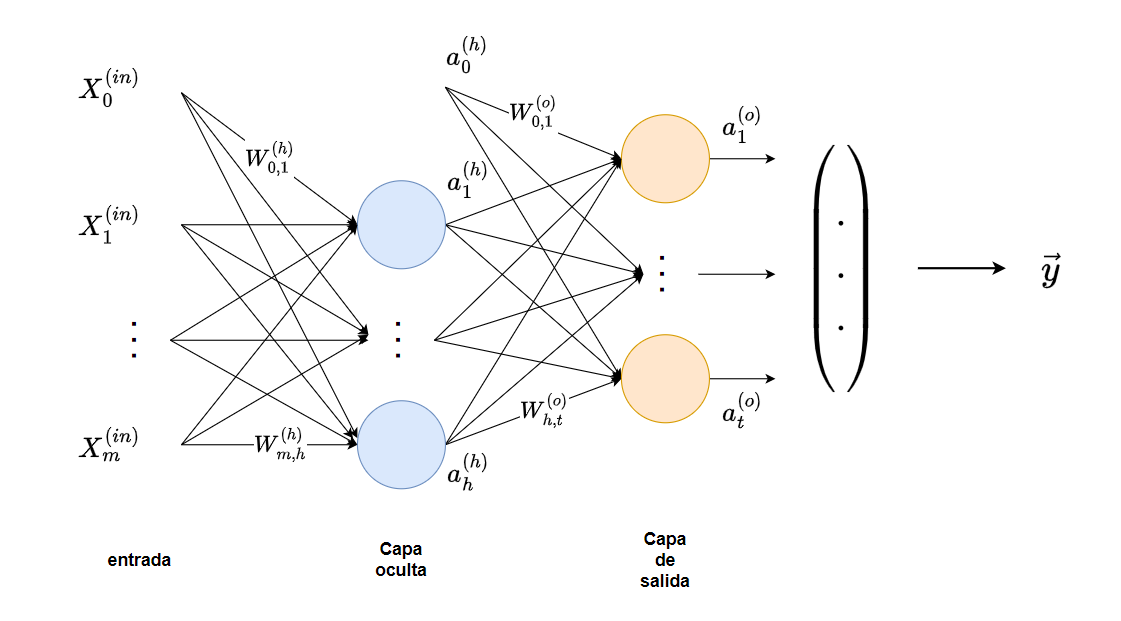

In [53]:
display(Image(filename='./2_imagenes/MLP.png', width=800))

Llamamos a la salida del _i-ésimo_ nodo en la _l-ésima_ capa: $a_i^{(l)}$.

$X_0^{(in)}$ y $a_0^{(h)}$ son las **unidades de bias** los cuales igualamos a 1.

Cada nodo en la capa $l$ está conectado a todos los nodos en la capa  $l+1$ a través de un coeficiente de la matriz de pesos. Como ejemplo, la conexión entre el _k-ésimo_ nodo en la capa $l$ al _j-ésimo_ nodo en la capa $l+1$ sería $w_{k,j}^{(l)}$. Cuando todas las neuronas en una capa están conectadas a cada neurona de la capa anterior, la capa se denomina _densa_ o _fully connected_.

Denominamos $W^{(h)}$ la matriz de pesos que conecta las entradas con la capa oculta y $W^{(o)}$ la matriz de pesos que conecta una capa oculta a la capa de salida.

La matriz de pesos $W^{(h)}$ tiene dimensiones $d$ x $m$ donde _d_ es el número de nodos de la capa oculta y _m_ es el número de entradas mas la unidad de bias.

## Algoritmo de entrenamiento de un Perceptrón Multicapa

1. Iniciando en la capa de entrada, propagamos hacia adelante los datos de entrenamiento a través de la red para obtener la salida.
2. En base a la salida de la red, calculamos el error que queremos minimizar usando una función de costo.
3. Hacemos la retropropagación del error, hallamos su derivada respecto a cada uno de los pesos en la red y actualizamos los pesos.

Después de repetir estos pasos y los pesos convergen, hacemos la propagación hacia adelante para obtener la salida de la red y aplicamos una función umbral para obtener la predicción de la etiqueta de clase.

## Funciones de activación

Para que el algoritmo de retropropagación funcione correctamente, es necesario cambiar las funciones de activación de cada perceptrón con la función logística.

Existen funciones de activación adicionales que funcionan muy bien con el algoritmo:

**Función Logística o Sigmoidea:** función continua y diferenciable en forma de 'S'. Sus valores de salida varían entre 0 y 1.

$$\sigma(z) = \frac{1}{(1 + exp(-z))}$$

**Función tangente hiperbólica:** similar a la anterior pero sus valores de salida varían entre -1 y 1.

$$\tanh(z) = 2\sigma(2z) -1$$

**Función unidad lineal rectificada (ReLU)** es continua pero no diferenciable en z=0, su derivada es 0 para $z<0$.

$$ReLU(z) = max(0,z)$$

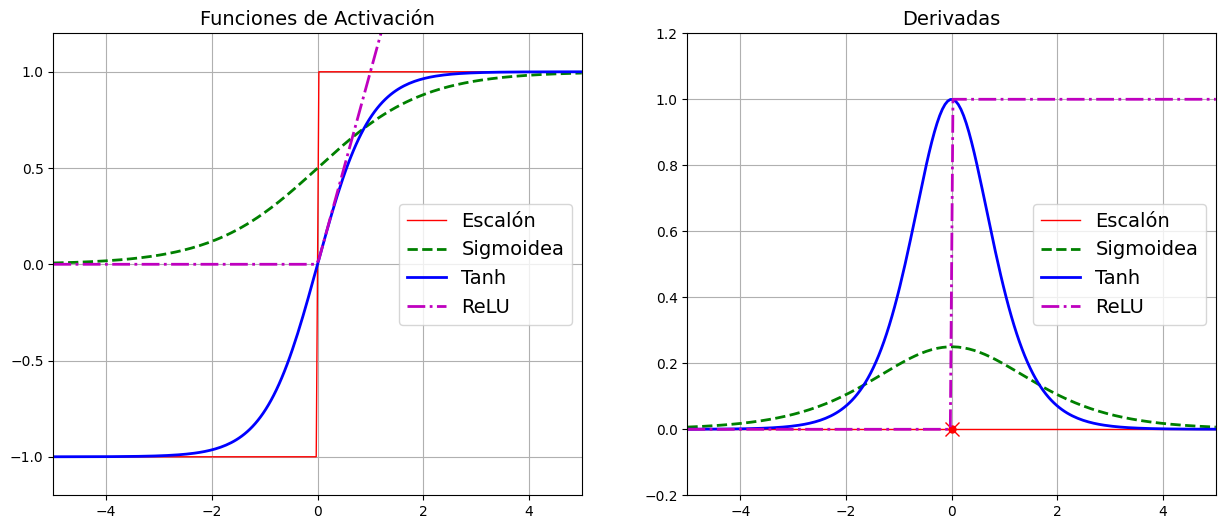

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Escalón")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoidea")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Funciones de Activación", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Escalón")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoidea")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivadas", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

### Uso de la clase _MLPClassifier_ de sklearn

A continuación vamos a utilizar la clase _MLPClassifier_ para resolver el problema del XOR.

Los datos de entrada (X) y salida (y) se encuentran en el archivo `datos_xor.mat` en la carpeta "data"

In [55]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

**cargamos y graficamos los datos**

In [56]:
# Cargamos los datos en variables de entrada (X) y salida (y)
datos_mat = sio.loadmat('./1_datos/datos_xor.mat')
#----------------------------------------------------------
X = datos_mat['X']
y = datos_mat['Y']
y=y.T
print("X: ",X.shape) # (80,2)
print("Y: ",y.shape) # (80,1)


X:  (80, 2)
Y:  (80, 1)


In [57]:
# prompt: #Modificamos las etiquetas de clase para tener clases 0 y 1
y[y == 0.1] = 0
y[y == 0.9] = 1



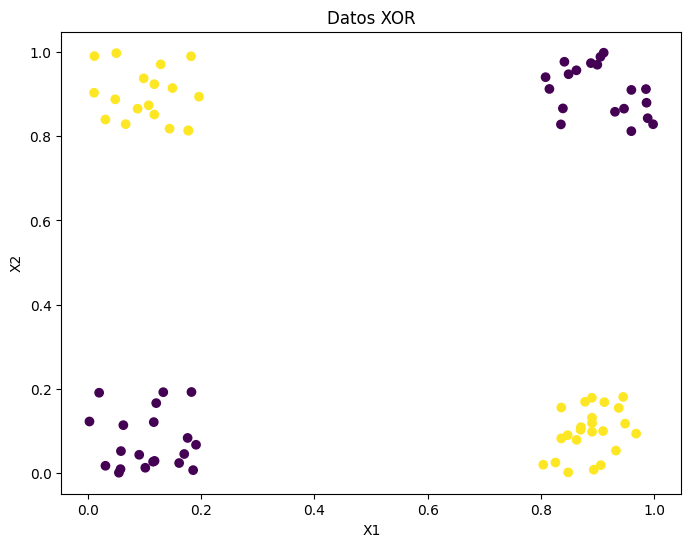

In [58]:
# Grafique los datos

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos XOR')
plt.show()


Entrenamos un clasificador _MLPClassifier_ con una capa oculta de 2 neuronas.

Use una función de activación sigmoidea ('logistic')  y un coeficiente de aprendizaje entre `0.1` y `0.5`.

Ver la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) de la clase.

89


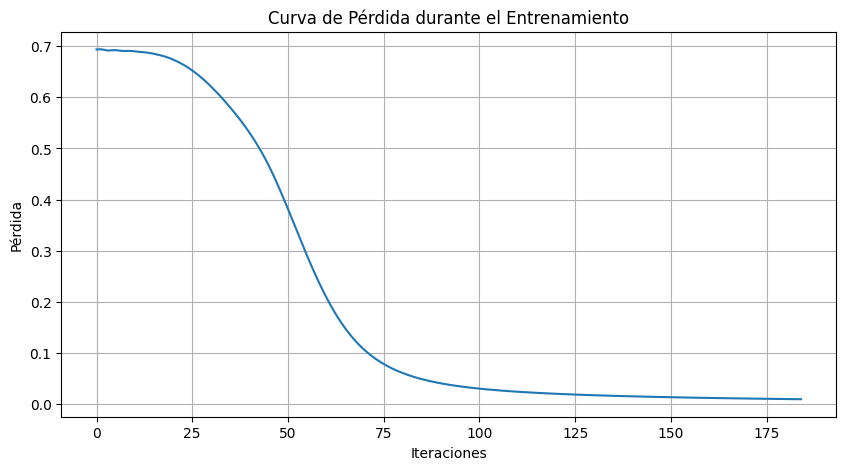

In [59]:
from sklearn.neural_network import MLPClassifier
n = np.random.randint(100)
print(n)
#---------------------------------------------------------
# Creo el clasificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.1, max_iter=500, random_state=42)

# Entreno el modelo
mlp.fit(X, y.ravel())  # Usamos ravel para que y tenga la forma correcta

# Grafique la curva de la función de costo o pérdida loss_curve_ (ver documentación)
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid()
plt.show()

Como vimos en clase de teoría. Las neuronas en la capa oculta, estarían realizando una transformación. Es decir, mapean el espacio de entrada (X) a un nuevo espacio (X') donde los datos pueden ser linealmente separados por el nodo en la capa de salida.

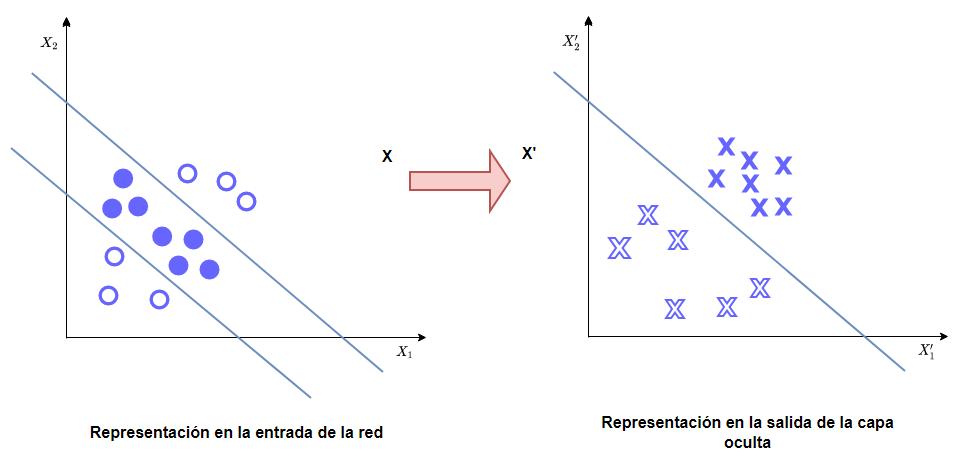

In [60]:
display(Image(filename='./2_imagenes/PMC_transformacion.png', width=1000))

Con los pesos de la capa oculta $w_h$ podemos obtener dos rectas que separan la representación de los datos entrada.

Podemos obtener las rectas a la salida de la capa oculta a partir de estos pesos $w_h$, de forma similar como hacíamos con el perceptrón simple:

$$\begin{pmatrix}1\\x_1\\x_2\end{pmatrix} \begin{pmatrix}w_{01}&w_{11}&w_{21}\\ w_{02}&w_{12}&w_{22}\\ \end{pmatrix} = 0$$

Esto nos dará como resultado dos rectas, de las cuales despejamos la pendiente y ordenada para graficarlas
$$ w_{01} + x_1 w_{11} + x_2 w_{21} = 0$$
$$ w_{02} + x_1 w_{12} + x_2 w_{22} = 0$$

### Obtener los coeficientes de los pesos de la capa oculta (Ver Documentación) y la capa de salida para graficar las rectas

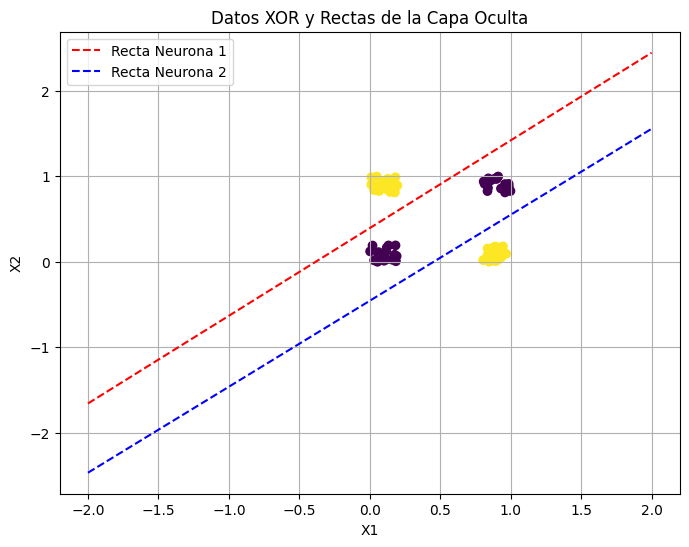

In [61]:
# prompt: # Obtenga los parámetros de las rectas (pendiente y ordenada) que se forman con los pesos w_h de la capa oculta
# #---------------------------------------------------------------------------
# # Grafique las 2 rectas junto a los datos
# #------------------------------------------------------------------------------------'

# Obtenga los coeficientes de los pesos de la capa oculta (Ver Documentación) y la capa de salida para graficar las rectas
# Obtenga los parámetros de las rectas (pendiente y ordenada) que se forman con los pesos w_h de la capa oculta
#---------------------------------------------------------------------------

# Acceder a los pesos de la capa oculta
hidden_layer_weights = mlp.coefs_[0]
hidden_layer_bias = mlp.intercepts_[0]


# Calcular las rectas
def calculate_line_parameters(weights, bias):
    # w0 + w1*x1 + w2*x2 = 0
    w0 = bias
    w1 = weights[0]
    w2 = weights[1]

    if w2 == 0:
        x1 = -w0 / w1
        return np.inf, x1  # pendiente infinita, intercepto en x

    m = -w1 / w2
    b = -w0 / w2
    return m, b

line1_m, line1_b = calculate_line_parameters(hidden_layer_weights[:, 0], hidden_layer_bias[0])
line2_m, line2_b = calculate_line_parameters(hidden_layer_weights[:, 1], hidden_layer_bias[1])


# Grafique las 2 rectas junto a los datos
#------------------------------------------------------------------------------------

x_vals = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos XOR y Rectas de la Capa Oculta')

if line1_m != np.inf:
    y_vals1 = line1_m * x_vals + line1_b
    plt.plot(x_vals, y_vals1, 'r--', label='Recta Neurona 1')

if line2_m != np.inf:
    y_vals2 = line2_m * x_vals + line2_b
    plt.plot(x_vals, y_vals2, 'b--', label='Recta Neurona 2')


plt.legend()
plt.grid()
plt.show()


### Visualizando los datos transformados

Para visualizar los datos transformados $\vec{a}^{(h)}$, debemos aplicar la función de activación $\phi()$ a la combinación lineal de las entradas y los pesos de la capa oculta $\vec{z}^{(h)}$ (una vez la red está entrenada)

$$ \vec{z}^{(h)} = \vec{x}^{(in)}.(\vec{W}^{(h)})^T $$

$$ \vec{a}^{(h)} = \phi(\vec{z}^{(h)})$$

$\vec{x}^{(in)}$ corresponde a los datos de entrada X mas el bias

In [62]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

Aplica la función de activación (en este caso, la logística) a la combinación lineal de las entradas y los pesos de la capa oculta para transformar los datos y grafique los datos obtenidos.

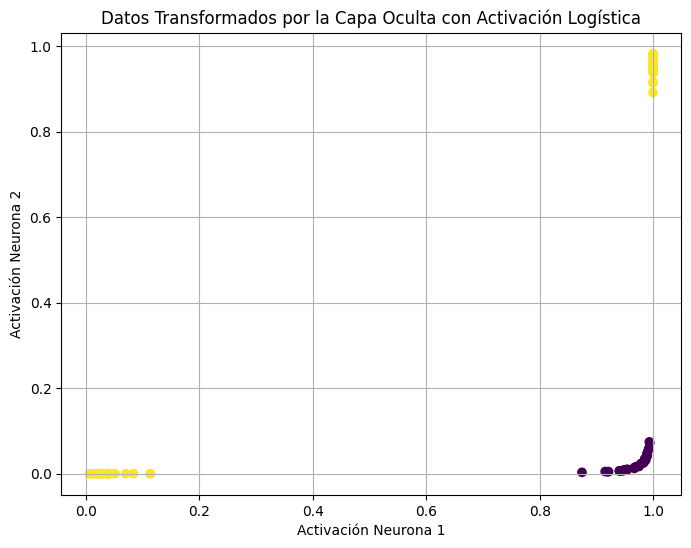

In [63]:
# Calcular la combinación lineal
z = np.dot(X, hidden_layer_weights) + hidden_layer_bias

# Aplicar la función de activación logística
activated_data = logistic(z)

# Graficar los datos transformados
plt.figure(figsize=(8, 6))
plt.scatter(activated_data[:, 0], activated_data[:, 1], c=y[:, 0], cmap='viridis')
plt.xlabel('Activación Neurona 1')
plt.ylabel('Activación Neurona 2')
plt.title('Datos Transformados por la Capa Oculta con Activación Logística')
plt.grid()
plt.show()


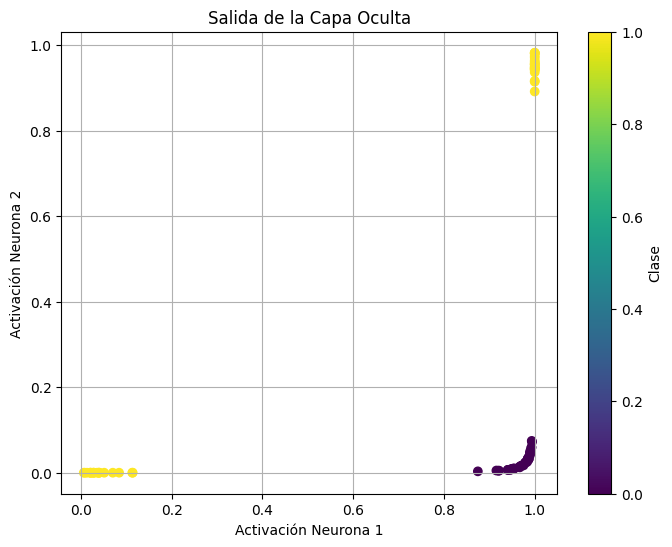

In [64]:
# Grafique la salida de la capa oculta

# Calcular las activaciones de la capa oculta
hidden_layer_input = np.dot(X, hidden_layer_weights) + hidden_layer_bias
hidden_layer_output = logistic(hidden_layer_input)

# Graficar la salida de la capa oculta
plt.figure(figsize=(8, 6))
plt.scatter(hidden_layer_output[:, 0], hidden_layer_output[:, 1], c=y[:, 0], cmap='viridis')
plt.xlabel('Activación Neurona 1')
plt.ylabel('Activación Neurona 2')
plt.title('Salida de la Capa Oculta')
plt.colorbar(label='Clase')
plt.grid()
plt.show()



### Se debe observar que ahora los datos a la salida de la capa oculta son linealmente separables
Ahora la frontera de decisión podemos encontrarla de la misma forma que hicimos con el perceptrón simple, excepto que esta vez trabajamos con un espacio _X'_ resultado de la transformación:

$$ w_0^{(o)} + x_1' w_1^{(o)} + x_2' w_2^{(o)} = 0$$

$w^{(o)}$ corresponde a los pesos en el nodo de salida

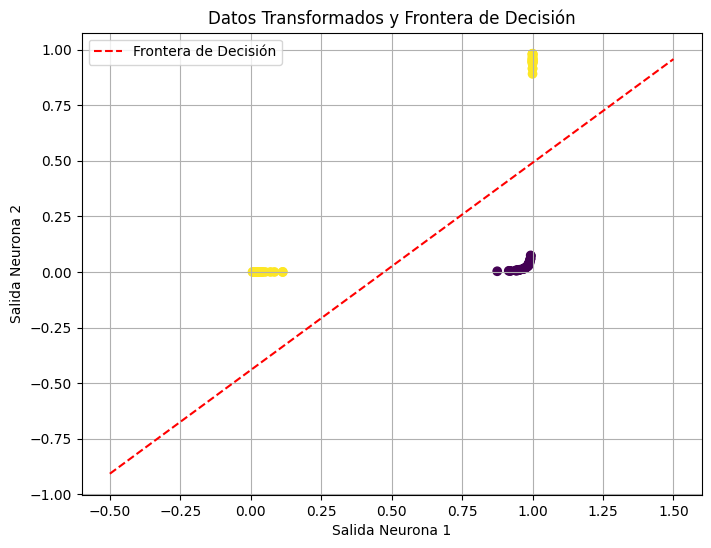

In [65]:
# Con los pesos del nodo en la capa de salida, armar la recta que separe
# los datos en el campo transformado
# --------------------------------------------------------------------------------------------------------
# Calcular la frontera de decisión

# Acceder a los pesos de la capa de salida
output_layer_weights = mlp.coefs_[1]  # Pesos de la capa de salida
output_layer_bias = mlp.intercepts_[1]  # Bias de la capa de salida

def calculate_decision_boundary(weights, bias):
    w0 = bias
    w1 = weights[0, 0]
    w2 = weights[1, 0]

    if w2 == 0:
        x1 = -w0 / w1
        return np.inf, x1  # Pendiente infinita, intercepto en x

    m = -w1 / w2
    b = -w0 / w2
    return m, b

decision_slope, decision_intercept = calculate_decision_boundary(output_layer_weights, output_layer_bias)

# Graficar los datos transformados y la recta
#-----------------------------------------------------------------------
# Graficar la salida de la capa oculta y la frontera de decisión
plt.figure(figsize=(8, 6))
plt.scatter(hidden_layer_output[:, 0], hidden_layer_output[:, 1], c=y[:, 0], cmap='viridis')
plt.xlabel('Salida Neurona 1')
plt.ylabel('Salida Neurona 2')
plt.title('Datos Transformados y Frontera de Decisión')

# Graficar la frontera de decisión
x_vals = np.linspace(-0.5, 1.5, 100)
if decision_slope != np.inf:
    y_vals = decision_slope * x_vals + decision_intercept
    plt.plot(x_vals, y_vals, 'r--', label='Frontera de Decisión')

plt.legend()
plt.grid()
plt.show()


### Ahora vamos a entrenar un PMC para resolver el problema de la siguiente figura:

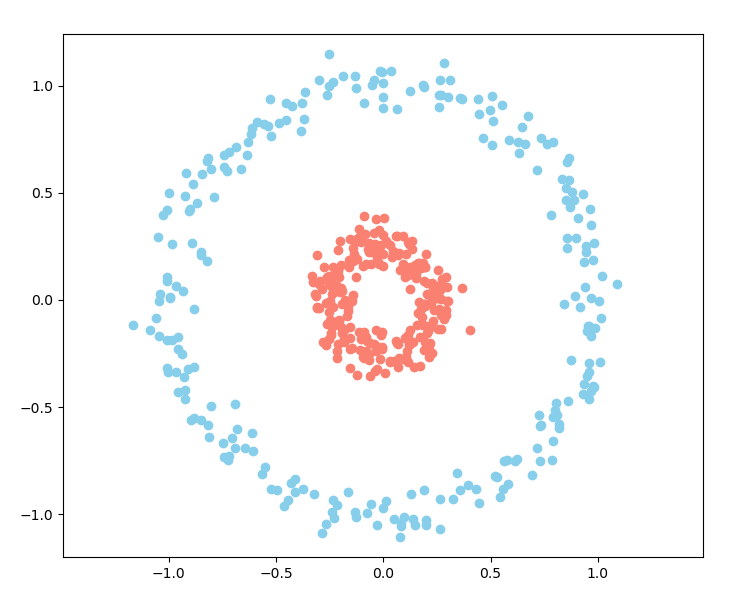

In [66]:
display(Image(filename='./2_imagenes/circle.png', width=700))

In [67]:
# Cargue los datos en variables de entrada (X) y salida (y)
#----------------------------------------
datos_mat = sio.loadmat('./1_datos/datos_circle.mat')
# Extraer X e y
X = datos_mat['X']  # Asegúrate de que la clave sea correcta según tu archivo
y = datos_mat['Y'].flatten()  # Asegúrate de que la clave sea correcta según tu archivo
print("X: ",X.shape) #(500, 2)
print("y: ",y.shape) #(500, 1)

X:  (500, 2)
y:  (500,)


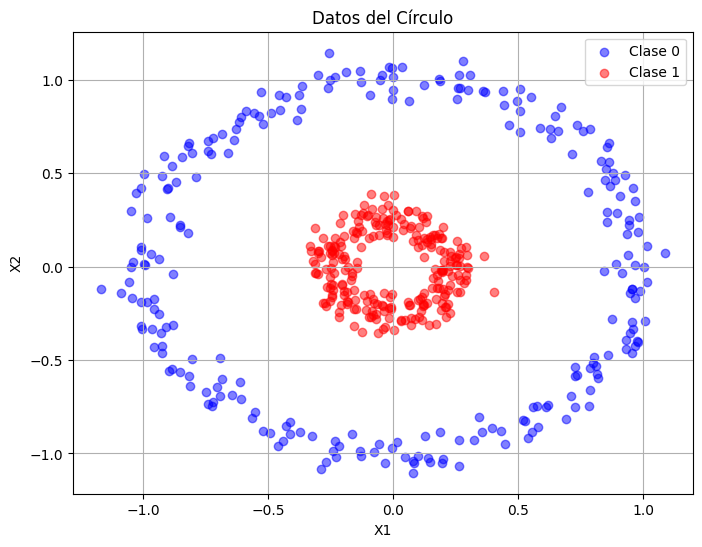

In [68]:
# Graficar los datos
#-----------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], color='blue', label='Clase 0', alpha=0.5)
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], color='red', label='Clase 1', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos del Círculo')
plt.legend()
plt.grid()
plt.show()



### Entrene un PMC

In [69]:

# Crear el clasificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.3, max_iter=1000, random_state=42)

# Entrenar el modelo
mlp.fit(X, y)

# Obtener la precisión del modelo
accuracy = mlp.score(X, y)
print("Precisión del modelo:", accuracy)




Precisión del modelo: 0.886


### Una vez entrenada la red usar la función **plot_decision_regions**  para graficar la frontera de decisión.

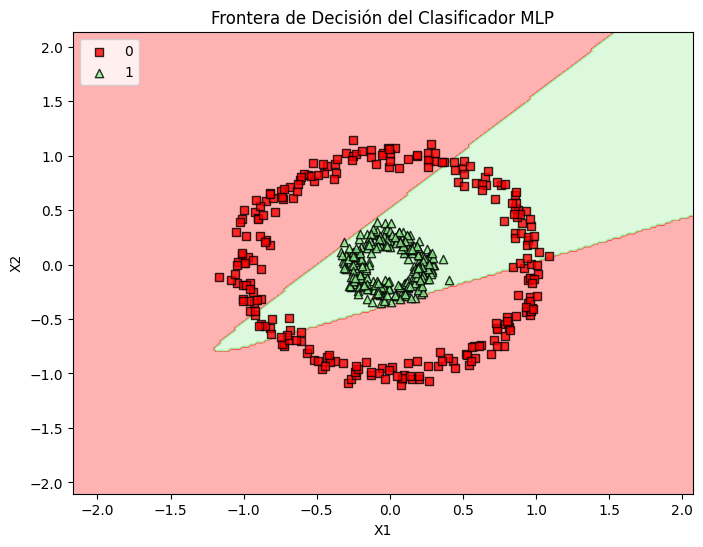

In [70]:
#Graficar usando plot_decision_regions
from modulos.graficacion import plot_decision_regions


# Graficar la frontera de decisión
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, clasificador=mlp)
plt.title('Frontera de Decisión del Clasificador MLP')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

### Analice cómo sería la transformación de los datos en la capa oculta para este ejercicio

- En qué dimensión están los datos luego de la transformación de la capa oculta. Cómo es la función que separa los datos? De forma opcional puede realizar la transformación y graficarla.